# SIMPLE RETURNS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data = yf.download("TCS.BO", start = "2015-1-1")

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,1277.175049,1281.750000,1271.000000,1274.099976,1080.227783,35272
2015-01-02,1273.625000,1294.500000,1273.625000,1285.425049,1089.829712,177124
2015-01-05,1296.500000,1299.525024,1263.500000,1268.949951,1075.861328,130358
2015-01-06,1263.500000,1263.500000,1220.025024,1223.275024,1037.136597,176534
2015-01-07,1230.250000,1239.500000,1203.699951,1208.400024,1024.524658,281004
...,...,...,...,...,...,...
2024-01-30,3801.500000,3845.750000,3786.000000,3799.100098,3799.100098,272018
2024-01-31,3804.149902,3834.899902,3797.000000,3814.750000,3814.750000,32384
2024-02-01,3816.199951,3904.699951,3805.000000,3851.449951,3851.449951,780437


In [4]:
data['Simple_Return'] = (data['Adj Close']/data['Adj Close'].shift(1))-1
print (data['Simple_Return'])

Date
2015-01-01         NaN
2015-01-02    0.008889
2015-01-05   -0.012817
2015-01-06   -0.035994
2015-01-07   -0.012160
                ...   
2024-01-30   -0.000592
2024-01-31    0.004119
2024-02-01    0.009621
2024-02-02    0.029833
2024-02-05    0.001614
Name: Simple_Return, Length: 2225, dtype: float64


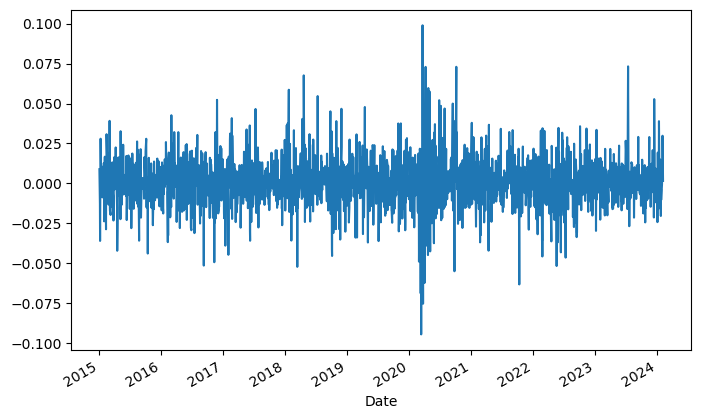

In [5]:
data['Simple_Return'].plot(figsize = (8,5))
plt.show()

In [6]:
avg_returns_daily = data['Simple_Return'].mean()
avg_returns_daily

0.0006979919128118222

In [7]:
avg_returns_annually = data['Simple_Return'].mean() * 250
avg_returns_annually

0.17449797820295557

In [8]:
print (str(round(avg_returns_annually, 5) * 100) + ' %')

17.45 %


# LOGARITHMIC RETURNS


In [9]:
data['Log_Return'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))-1
print (data['Log_Return'])

Date
2015-01-01         NaN
2015-01-02   -0.991150
2015-01-05   -1.012900
2015-01-06   -1.036658
2015-01-07   -1.012235
                ...   
2024-01-30   -1.000592
2024-01-31   -0.995889
2024-02-01   -0.990425
2024-02-02   -0.970603
2024-02-05   -0.998388
Name: Log_Return, Length: 2225, dtype: float64


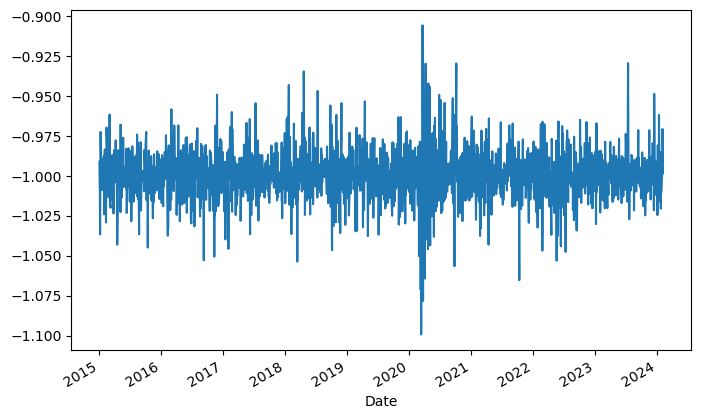

In [10]:
data['Log_Return'].plot(figsize = (8,5))
plt.show()

In [23]:
log_returns_daily = data['Log_Return'].mean()
log_returns_daily

-0.9994144394690471

In [24]:
log_returns_annually = data['Log_Return'].mean() * 250
log_returns_annually

-249.85360986726175

In [32]:
print (str(round(log_returns_annually, 5) * 100) + " %")

-24985.361 %


# NORMALIZATION TO 100

In [35]:
tickers = ["TCS.BO","RELIANCE.BO","SBIN.BO","MRF.BO"]
mydata = pd.DataFrame()

for i in tickers:
    mydata[i] = yf.download(i, start = '2015-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [37]:
mydata

,TCS.BO,RELIANCE.BO,SBIN.BO,MRF.BO
Date,,,,
2015-01-01,1080.227905,415.979218,300.182526,37723.796875
2015-01-02,1089.829468,414.831604,301.425476,37908.355469
2015-01-05,1075.861328,410.850067,298.891724,38215.394531
2015-01-06,1037.136719,391.644867,286.796448,37207.414062
2015-01-07,1024.524902,400.685425,287.178894,37137.976562
...,...,...,...,...
2024-01-30,3799.100098,2814.850098,626.599976,140723.406250
2024-01-31,3814.750000,2853.199951,640.650024,142505.046875
2024-02-01,3851.449951,2852.699951,647.849976,142734.843750


In [38]:
mydata.iloc[0]

TCS.BO          1080.227905
RELIANCE.BO      415.979218
SBIN.BO          300.182526
MRF.BO         37723.796875
Name: 2015-01-01 00:00:00, dtype: float64

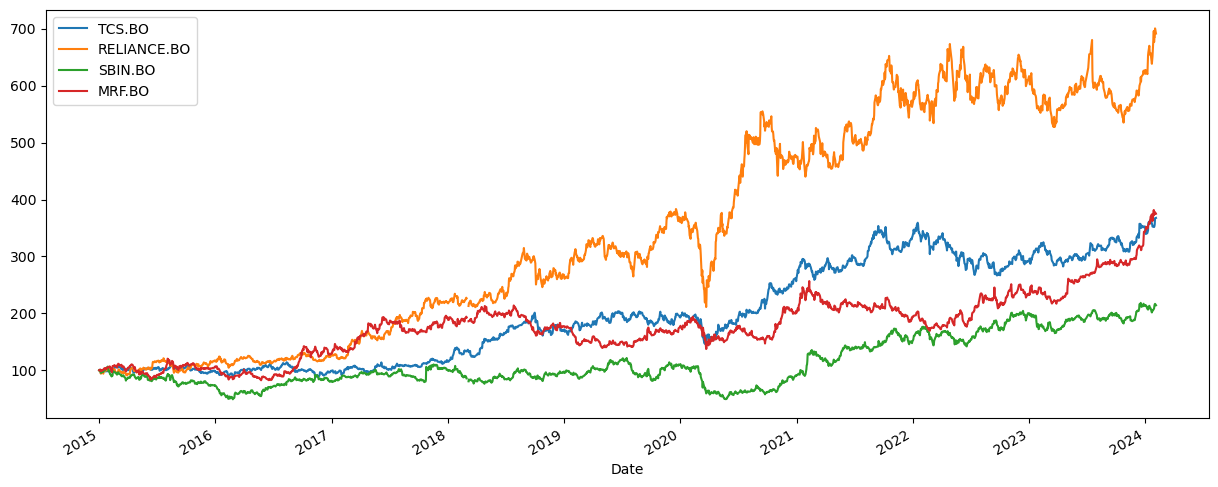

In [43]:
(mydata/mydata.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

# CALCULATING RETURNS ON PORTFOLIO

In [48]:
port_returns = (mydata/mydata.shift(1)) - 1
port_returns

,TCS.BO,RELIANCE.BO,SBIN.BO,MRF.BO
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,0.008888,-0.002759,0.004141,0.004892
2015-01-05,-0.012817,-0.009598,-0.008406,0.008100
2015-01-06,-0.035994,-0.046745,-0.040467,-0.026376
2015-01-07,-0.012160,0.023084,0.001334,-0.001866
...,...,...,...,...
2024-01-30,-0.000592,-0.028072,0.005940,-0.022412
2024-01-31,0.004119,0.013624,0.022423,0.012661
2024-02-01,0.009621,-0.000175,0.011239,0.001613


In [46]:
weights = np.array([0.25,0.25,0.25,0.25])

In [49]:
np.dot(port_returns,weights)

array([        nan,  0.00379066, -0.00568029, ...,  0.00557409,
        0.01153311, -0.00540964])

In [51]:
port_returns_annual = port_returns.mean() * 250
port_returns_annual

TCS.BO         0.174498
RELIANCE.BO    0.264698
SBIN.BO        0.151818
MRF.BO         0.188258
dtype: float64

In [52]:
np.dot(port_returns_annual,weights)

0.19481795503913277

In [83]:
portfolio_1 = str(round(np.dot(port_returns_annual, weights), 4) * 100) + " %"
print (portfolio_1)

19.48 %


In [84]:
# CHANGING THE WEIGHTS OF THE PORTFOLIO
weights_1 = np.array([0.4,0.4,0.15,0.05])

In [85]:
np.dot(port_returns_annual, weights_1)

0.2078639932263749

In [86]:
portfolio_2 = str(round(np.dot(port_returns_annual,weights_1), 4) * 100) + " %"
print (portfolio_2)

20.79 %


In [88]:
print (portfolio_1)
print (portfolio_2)

19.48 %
20.79 %


# INDICES RATE OF RETURN

In [90]:
tickers_1 = ["^BSESN","^NSEI"]
indexdata = pd.DataFrame()

for j in tickers_1:
    indexdata[j] = yf.download(j, start = '2015-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [92]:
indexdata

,^BSESN,^NSEI
Date,,
2015-01-02,27887.900391,8395.450195
2015-01-05,27842.320312,8378.400391
2015-01-06,26987.460938,8127.350098
2015-01-07,26908.820312,8102.100098
2015-01-08,27274.710938,8234.599609
...,...,...
2024-01-30,71139.898438,21522.099609
2024-01-31,71752.109375,21725.699219
2024-02-01,71645.296875,21697.449219


In [93]:
indexdata.iloc[0]

^BSESN    27887.900391
^NSEI      8395.450195
Name: 2015-01-02 00:00:00, dtype: float64

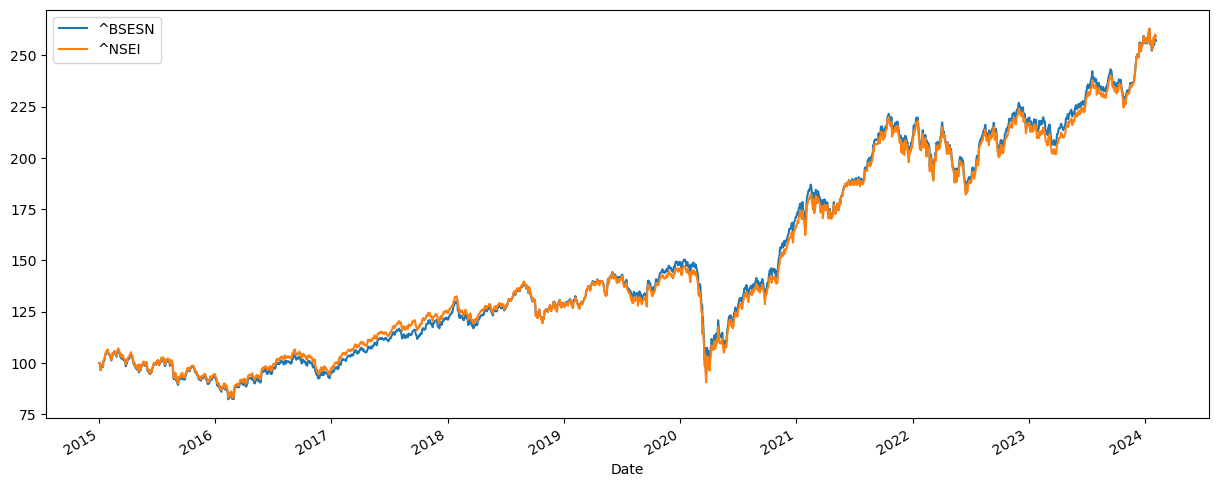

In [94]:
(indexdata/indexdata.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

In [95]:
index_returns = (indexdata/indexdata.shift(1)) - 1
index_returns

,^BSESN,^NSEI
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.001634,-0.002031
2015-01-06,-0.030704,-0.029964
2015-01-07,-0.002914,-0.003107
2015-01-08,0.013597,0.016354
...,...,...
2024-01-30,-0.011143,-0.009914
2024-01-31,0.008606,0.009460
2024-02-01,-0.001489,-0.001300


In [97]:
index_returns_annual = index_returns.mean() * 250
index_returns_annual

^BSESN    0.120094
^NSEI     0.123033
dtype: float64

In [98]:
print (str(round(index_returns_annual, 5) * 100) + " %")

^BSESN    12.009
^NSEI     12.303
dtype: float64 %
